# **Importação das Bibliotecas**

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# **Importação da Base de Dados**

In [ ]:
# Download latest version
path = kagglehub.dataset_download("adityaramachandran27/world-air-quality-index-by-city-and-coordinates")

print("Path to dataset files:", path)

100%|██████████| 372k/372k [00:00<00:00, 50.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/adityaramachandran27/world-air-quality-index-by-city-and-coordinates/versions/1


# **Pegando o Caminho do Arquivo == "full_path"/"path"**

In [ ]:
# Mostra os arquivos dentro da pasta
print("Caminho do dataset:", path)
print("Arquivos disponíveis:", os.listdir(path))

# Supondo que o nome do arquivo seja 'stellardata.csv' (ou outro .csv encontrado)
csv_file = [f for f in os.listdir(path) if f.endswith('.csv')][0]  # pega o primeiro CSV
full_path = os.path.join(path, csv_file)

# Carrega os dados no DataFrame
df = pd.read_csv(full_path)

Caminho do dataset: /root/.cache/kagglehub/datasets/adityaramachandran27/world-air-quality-index-by-city-and-coordinates/versions/1
Arquivos disponíveis: ['AQI and Lat Long of Countries.csv']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB


# **Seleção do Modelo de Classificação**

In [ ]:
# 1. Selecionando Colunas Úteis
X = df[['CO AQI Value', 'Ozone AQI Value', 'PM2.5 AQI Value']]
y = df['AQI Category']

# 2. Codificando os rótulos de texto para números
encoder = OrdinalEncoder()
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1)).ravel()

# 3. Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 4. Testando modelos
modelos = {
    'Regressão Logística': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Árvore de Decisão': DecisionTreeClassifier()
}

# 5. Avaliando
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{nome}: Acurácia = {acc:.2f}")


Regressão Logística: Acurácia = 0.94
KNN: Acurácia = 0.99
Árvore de Decisão: Acurácia = 1.00


# **RELATÓRIO DE CLASSIFICAÇÃO/CLASSIFICATION REPORT**

- **Como o modelo utilizado foi a Árvore de Decisão obtendo 100% de acerto o Método de Classification Report foi todo 100%**

In [ ]:
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))


Relatório de Classificação:
                                precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      1569
                     Hazardous       1.00      1.00      1.00         9
                      Moderate       1.00      1.00      1.00      1431
                     Unhealthy       1.00      1.00      1.00       158
Unhealthy for Sensitive Groups       1.00      1.00      1.00       147
                Very Unhealthy       1.00      1.00      1.00        25

                      accuracy                           1.00      3339
                     macro avg       1.00      1.00      1.00      3339
                  weighted avg       1.00      1.00      1.00      3339



In [ ]:
results = []

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        'Modelo': nome,
        'Acurácia': acc,
        **report['weighted avg']
    })

df_results = pd.DataFrame(results)
df_results_sorted = df_results.sort_values(by='Acurácia', ascending=False)
df_results_sorted


,Modelo,Acurácia,precision,recall,f1-score,support
2,Árvore de Decisão,1.000000,1.000000,1.000000,1.000000,3339.0
1,KNN,0.992812,0.992955,0.992812,0.992810,3339.0
0,Regressão Logística,0.937107,0.939483,0.937107,0.936178,3339.0


# **Exemplo Teste**

In [ ]:
novo_exemplo = pd.DataFrame({
    'CO AQI Value': [30],
    'Ozone AQI Value': [50],
    'PM2.5 AQI Value': [99],
})

pred_novo = modelo.predict(novo_exemplo)
print("Previsão:", encoder.inverse_transform(pred_novo.reshape(-1, 1))[0][0])


Previsão: Moderate


# **Algoritimo para Ver a melhor quantidade de "Seeds" para a árvore**

- Bibliotecas Utilizadas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import _tree

- **Código Gerado**

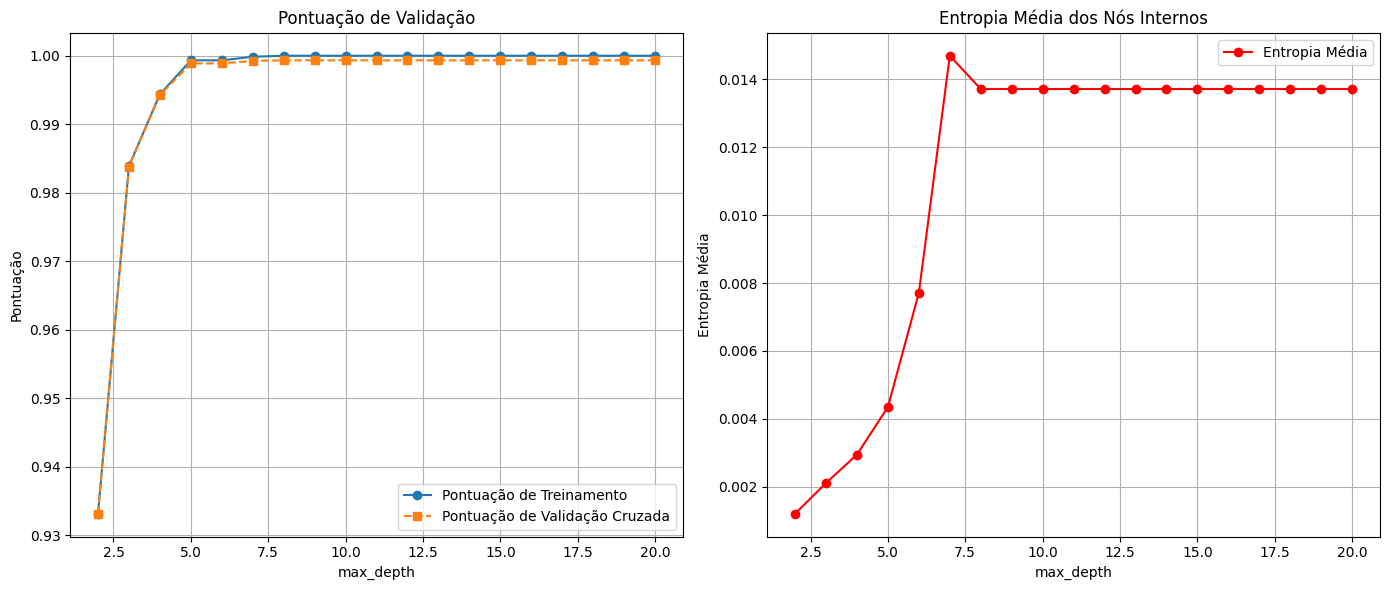

In [ ]:
# Defina a semente aleatória para garantir a reprodutibilidade
np.random.seed(42)

# Defina os valores de max_depth que você deseja testar
param_range = np.arange(2, 21)

# Função para calcular a entropia média dos nós internos
def calculate_avg_entropy(tree):
    tree_ = tree.tree_
    n_node_samples = tree_.n_node_samples
    weighted_entropy = np.zeros(tree_.node_count)

    def entropy(p):
        return -np.sum(p * np.log2(p + 1e-10))  # Adiciona um pequeno valor para evitar log(0)

    entropies = []

    # Para cada nó interno
    for node in range(tree_.node_count):
        if tree_.children_left[node] != tree_.children_right[node]:  # Nó interno
            left_child = tree_.children_left[node]
            right_child = tree_.children_right[node]
            left_proportion = n_node_samples[left_child] / n_node_samples[node]
            right_proportion = n_node_samples[right_child] / n_node_samples[node]
            left_entropy = entropy(tree_.impurity[left_child] / n_node_samples[left_child])
            right_entropy = entropy(tree_.impurity[right_child] / n_node_samples[right_child])
            entropies.append(left_proportion * left_entropy + right_proportion * right_entropy)
    return np.mean(entropies) if entropies else np.nan

# Inicialize listas para armazenar os resultados
train_mean = []
test_mean = []
avg_entropy = []

# Iterar sobre cada valor de max_depth
for depth in param_range:
    # Crie um classificador de árvore de decisão com a semente aleatória e o critério atual
    classifier = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)

    # Calcule as pontuações de validação para diferentes valores de max_depth
    train_scores, test_scores = validation_curve(
        estimator=classifier,
        X=X_train,
        y=y_train,
        param_name='max_depth',
        param_range=[depth],
        cv=5  # Número de dobras de validação cruzada
    )

    # Calcule a média e o desvio padrão das pontuações de treinamento e teste
    train_mean.append(np.mean(train_scores))
    test_mean.append(np.mean(test_scores))

    # Treine o modelo e calcule a entropia média dos nós internos
    classifier.fit(X_train, y_train)
    avg_entropy.append(calculate_avg_entropy(classifier))

# Trace a curva de validação e a entropia
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(param_range, train_mean, marker='o', label='Pontuação de Treinamento')
plt.plot(param_range, test_mean, linestyle='--', marker='s', label='Pontuação de Validação Cruzada')
plt.title('Pontuação de Validação')
plt.xlabel('max_depth')
plt.ylabel('Pontuação')
plt.legend(loc='best')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(param_range, avg_entropy, marker='o', color='red', label='Entropia Média')
plt.title('Entropia Média dos Nós Internos')
plt.xlabel('max_depth')
plt.ylabel('Entropia Média')
plt.legend(loc='best')
plt.grid()

# Mostre os gráficos
plt.tight_layout()
plt.show()


In [ ]:
# CRIAR UM ALGORTIMO QUE SERÁ DO TIPO DE ÁRVORE DE DECISÃO
algortimo_arvore = DecisionTreeClassifier(criterion='entropy', max_depth=8)

#AGORA PRECISAMOS TREINÁ-LA
modelo = algortimo_arvore.fit(X_train, y_train)

In [ ]:
X.columns

Index(['CO AQI Value', 'Ozone AQI Value', 'PM2.5 AQI Value'], dtype='object')

# **Algoritimo para Converter uma Variável em String para manipulação da mesma na montagem da árvore**

In [ ]:
from sklearn.tree import export_graphviz
from io import StringIO

nome_features = X.columns
nome_classes = [str(c) for c in np.unique(y_encoded)]  # converter para string

dot_data = StringIO()
export_graphviz(modelo, out_file=dot_data, filled=True,
                feature_names=nome_features,
                class_names=nome_classes,
                rounded=True, special_characters=True)

# Agora pode usar p.ex. graphviz para visualizar:
import graphviz
graph = graphviz.Source(dot_data.getvalue())
graph.view()


'Source.gv.pdf'

# **Plotagem da Árvore**

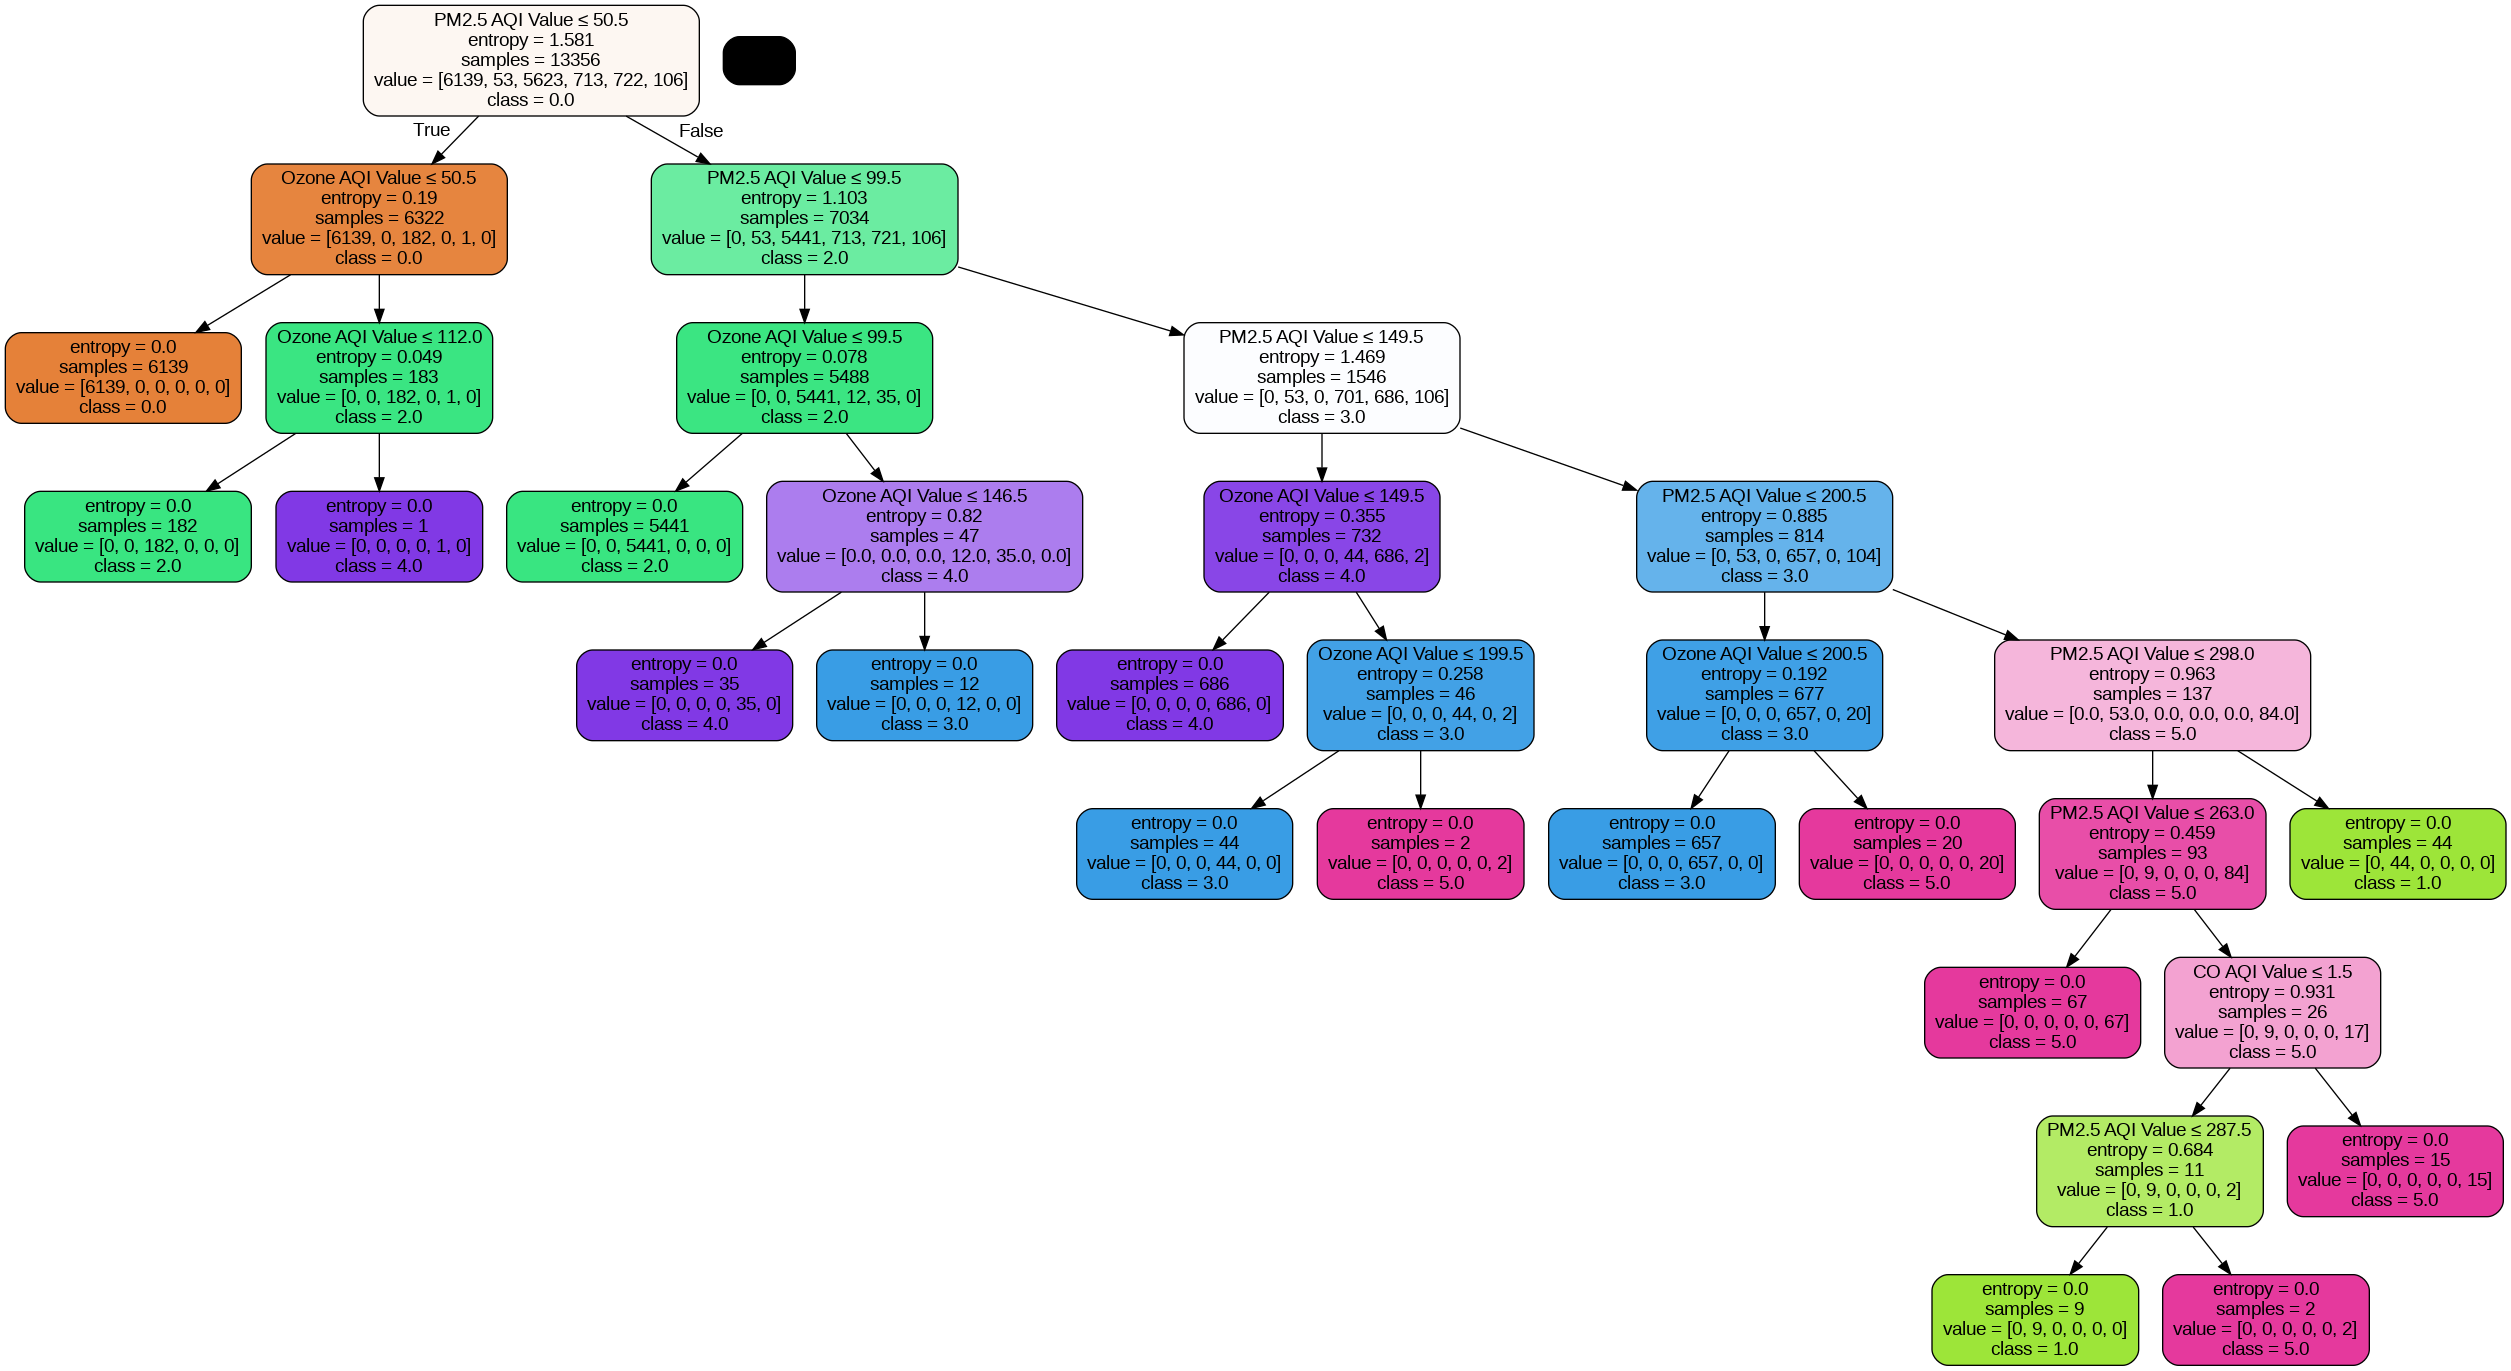

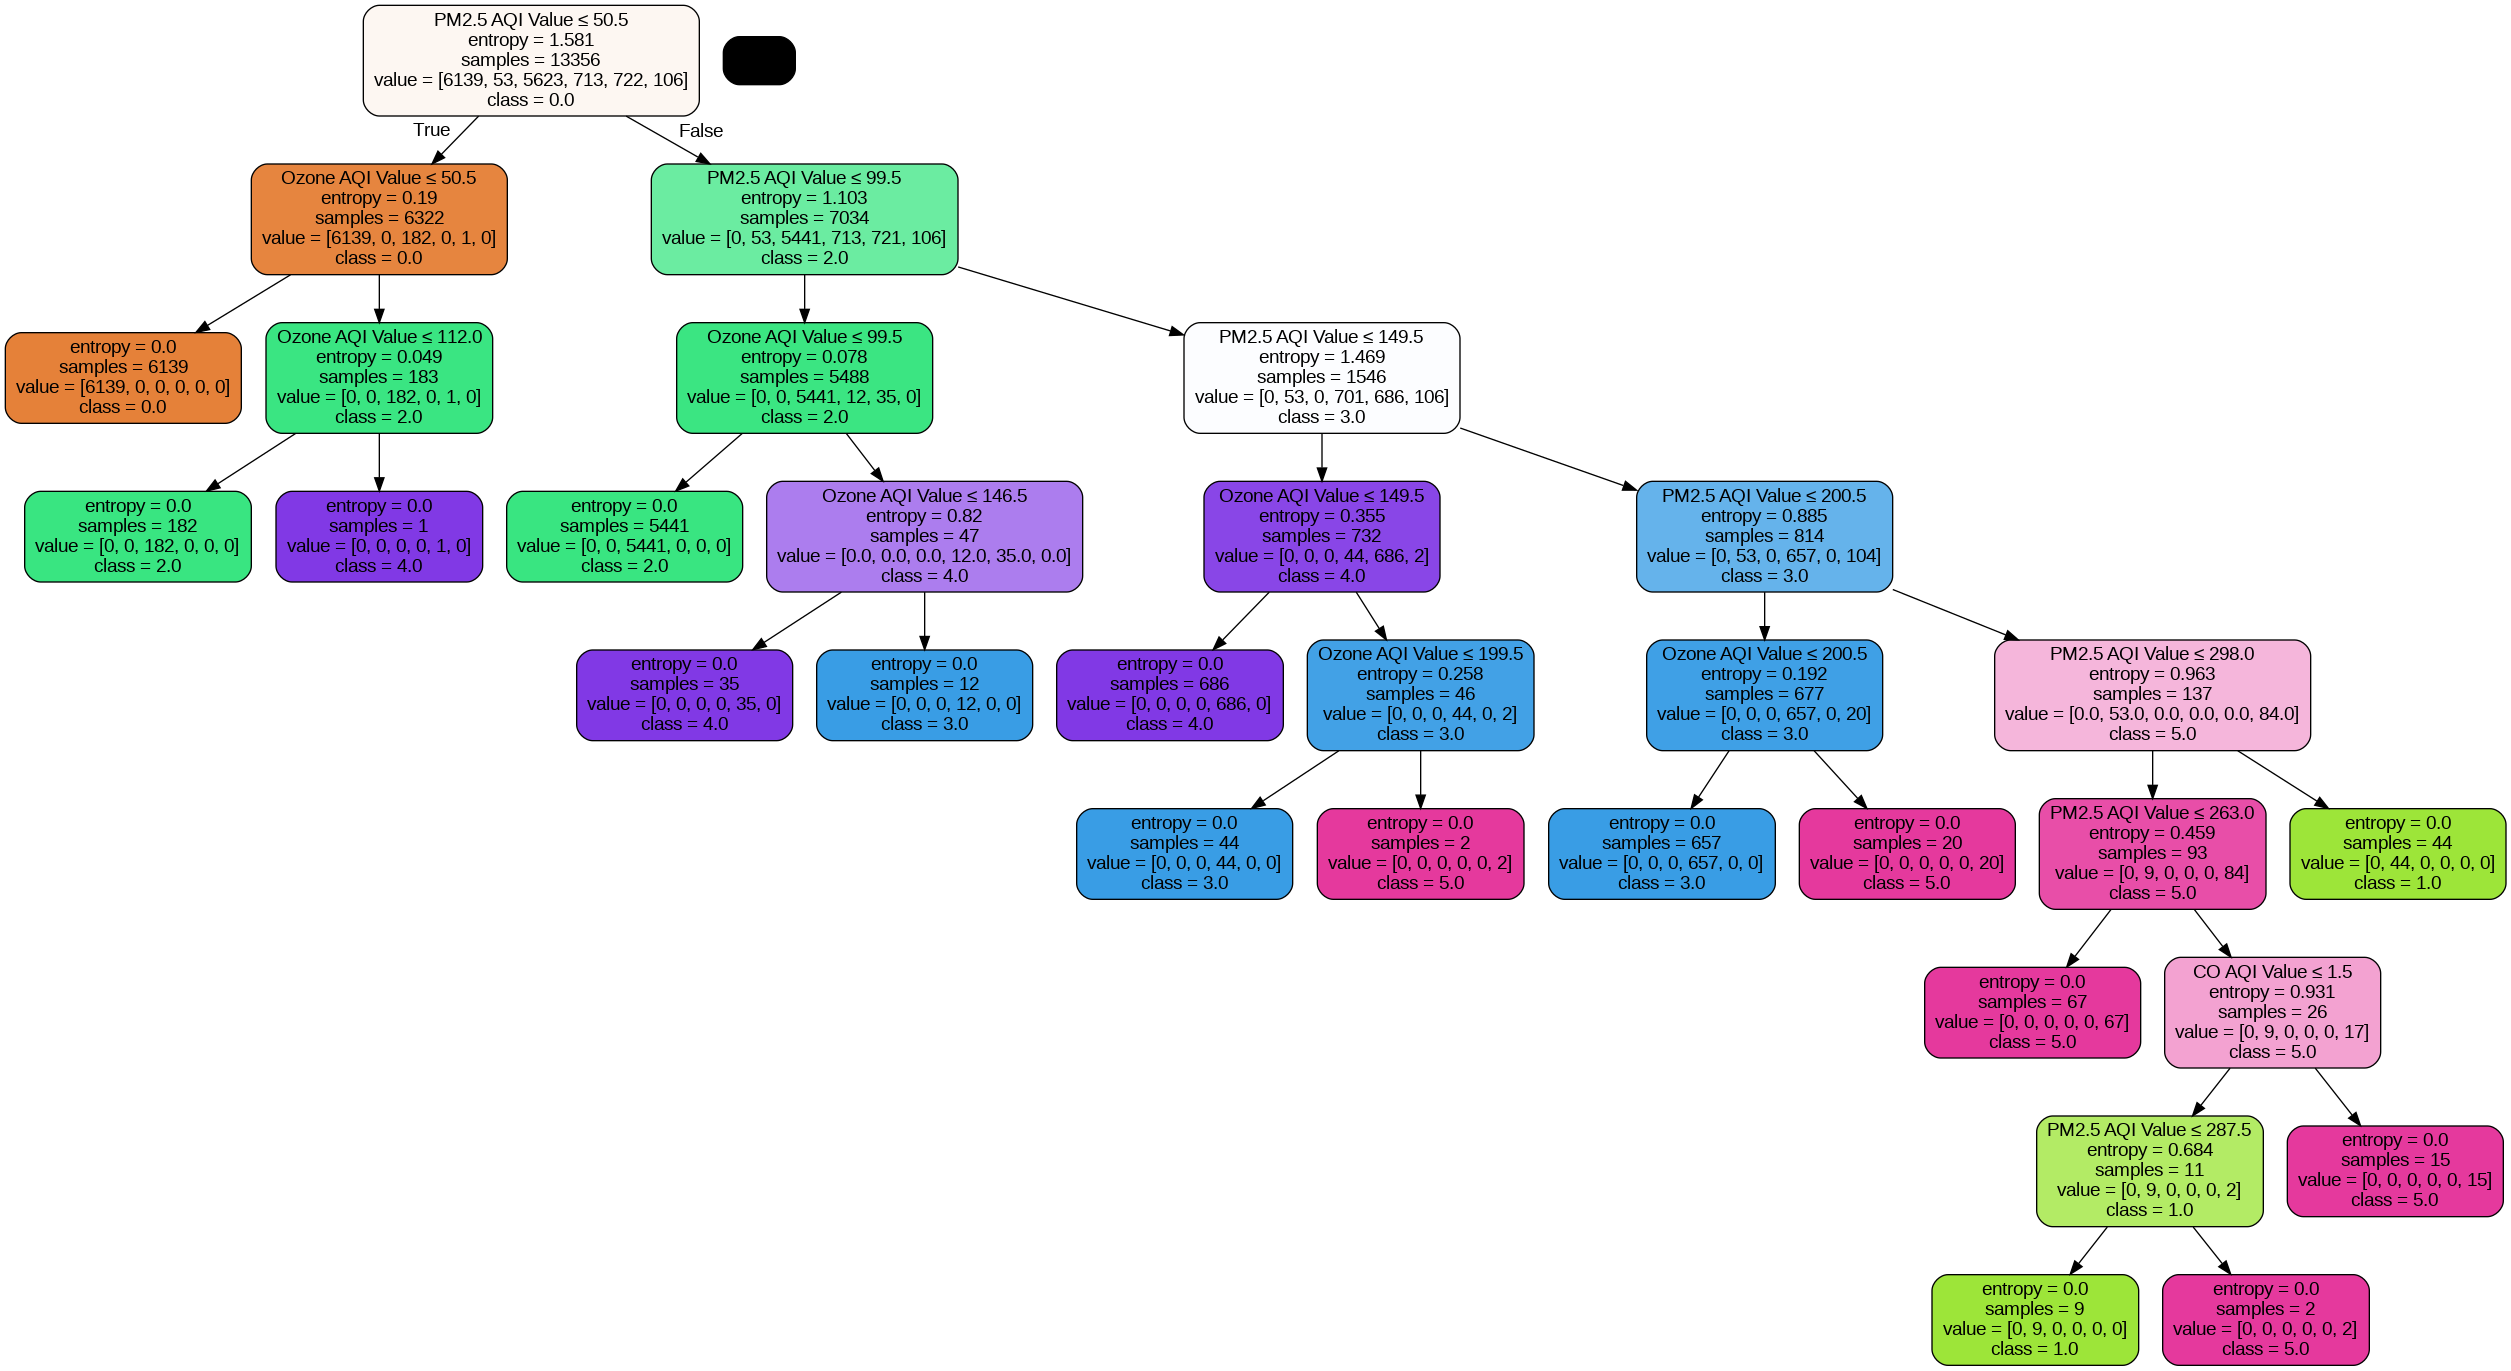

In [ ]:
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image

# Lista atualizada com os nomes corretos das features
nome_features = ['CO AQI Value', 'Ozone AQI Value', 'PM2.5 AQI Value']

# Converter classes para string para evitar erro no export_graphviz
nome_classes = [str(c) for c in modelo.classes_]

# MONTAR A IMAGEM DA ÁRVORE
dot_data = StringIO()
export_graphviz(modelo, out_file=dot_data, filled=True, feature_names=nome_features,
                class_names=nome_classes, rounded=True, special_characters=True)

# Converter para imagem com pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
display(Image(graph.create_png()))

# Salvar a imagem em arquivo
graph.write_png("arvore.png")
display(Image('arvore.png'))


# **Variáveis Utilizadas e suas importâncias dentro da Árvore**

# **O valor do PM2.5 AQI Value indica o quão prejudicial está a qualidade do ar com base apenas nas partículas PM2.5.**

**Exemplo de faixas (baseadas na EPA dos EUA):**
 **PM2.5 AQI Value (AQI = Air Quality Index)	Qualidade do Ar	Impacto na Saúde:**

*0 – 50  Boa	Sem risco*

*51 – 100	Moderada	Pouco risco para pessoas sensíveis*

*101 – 150	Ruim para sensíveis	Pessoas com problemas respiratórios podem ser afetadas*

*151 – 200	Ruim	Todos podem começar a sentir efeitos*

*201 – 300	Muito ruim	Risco elevado à saúde*

*301 – 500	Perigosa	Alerta de saúde para toda a população*

Features na ordem:
1. PM2.5 AQI Value (0.903419)
2. Ozone AQI Value (0.095791)
3. CO AQI Value (0.000789)


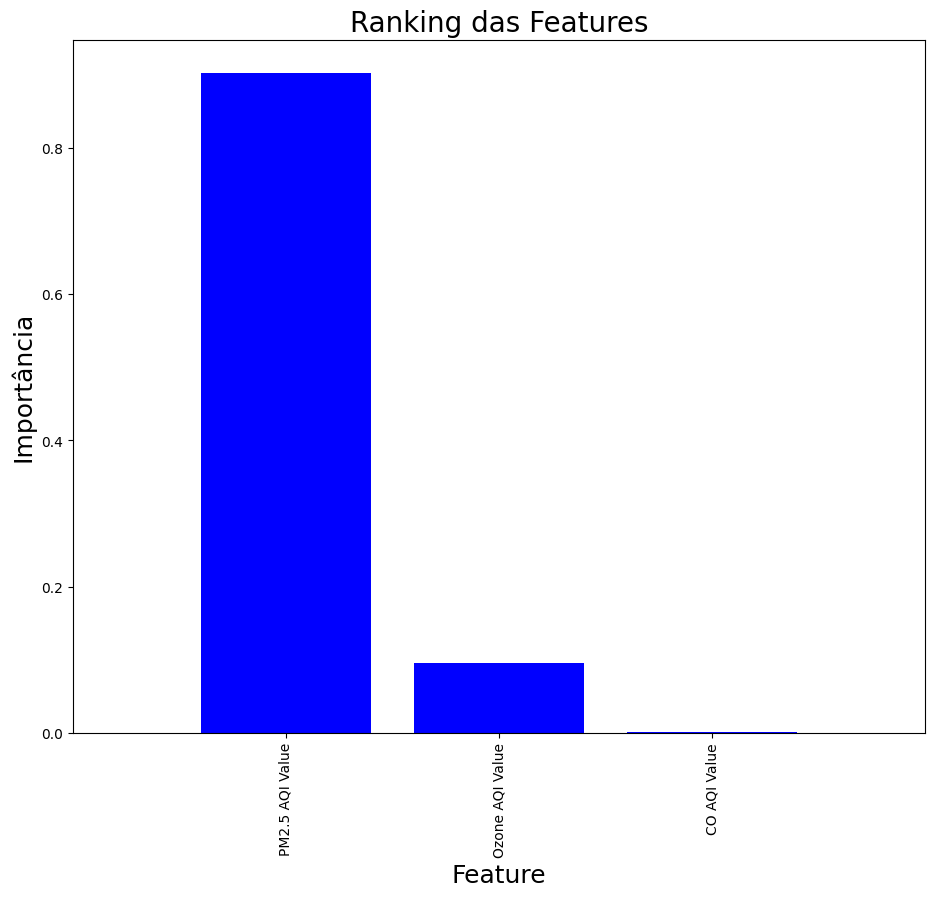

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Com os modelos treinados e as importâncias das Features.
importances = modelo.feature_importances_
indices = np.argsort(importances)[::-1]

# Nomes das features
feature_names = ['CO AQI Value', 'Ozone AQI Value', 'PM2.5 AQI Value']

print("Features na ordem:")
for f in range(X.shape[1]):
    print(f"{f + 1}. {feature_names[indices[f]]} ({importances[indices[f]]:.6f})")

# Plotando o ranking das features
f, ax = plt.subplots(figsize=(11, 9))
plt.title("Ranking das Features", fontsize=20)
plt.bar(range(X.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylabel("Importância", fontsize=18)
plt.xlabel("Feature", fontsize=18)
plt.show()


- classification report

- matriz de confusão

# **Confusion Matrix**

In [ ]:
y_pred = modelo.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# pegar a classe dos nomes do codificador
class_names = encoder.categories_[0]


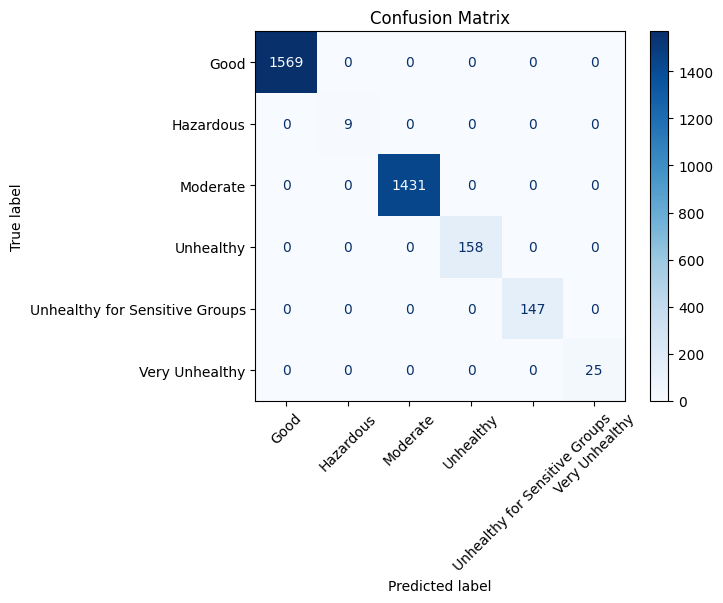

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()
